# Trabalho de Localização de Uso da Informação (LUI)
## O objetivo do trabalho é extrair informações de uma fonte de sua própria escolha, sendo através de uma **API** ou por **Web Scraping**, fornecendo o código com o output do dataframe e as saidas após as seguintes operações de Ordenação e Filtragem.

 Para este trabalho, foi escolhido a extração de um API fornecido pela empresa onde trabalho - Furnas Centrais Elétricas.

#Execução do trabalho

Bibliotecas importadas para este trabalho

In [1]:
import requests
import json
import pandas as pd

  O site abaixo foi desenvolvido pelo **Departamento de Tecnologia Digital** com o intuito de agilizar processos de consultas de dados mestres consolidados pela Companhia contendo informações úteis de colaboradores e informações de usina 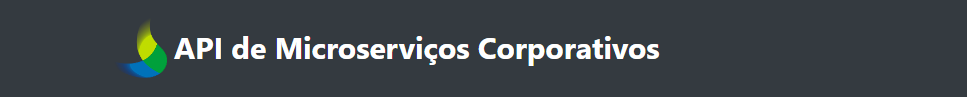

In [2]:
colaboradores = "http://corp3025/colaboradores"

**Observação** 
  Como estou trabalhando em uma base interna da Companhia, o Google Colaboration usa acesso externo e não consegui a justificativa de liberação da porta 80 e 443 para extrair os dados diretamente para a ferramenta gerando o erro abaixo.

In [3]:
df = pd.read_json(colaboradores)

URLError: ignored

Alternativamente, entrei no site http://corp3025/colaboradores salvando o seu resultado em formato .Json e colocando em meu Google Drive, entendendo que o processo de extração, surge no momento de coleta do dado e disponibilizando para uso.

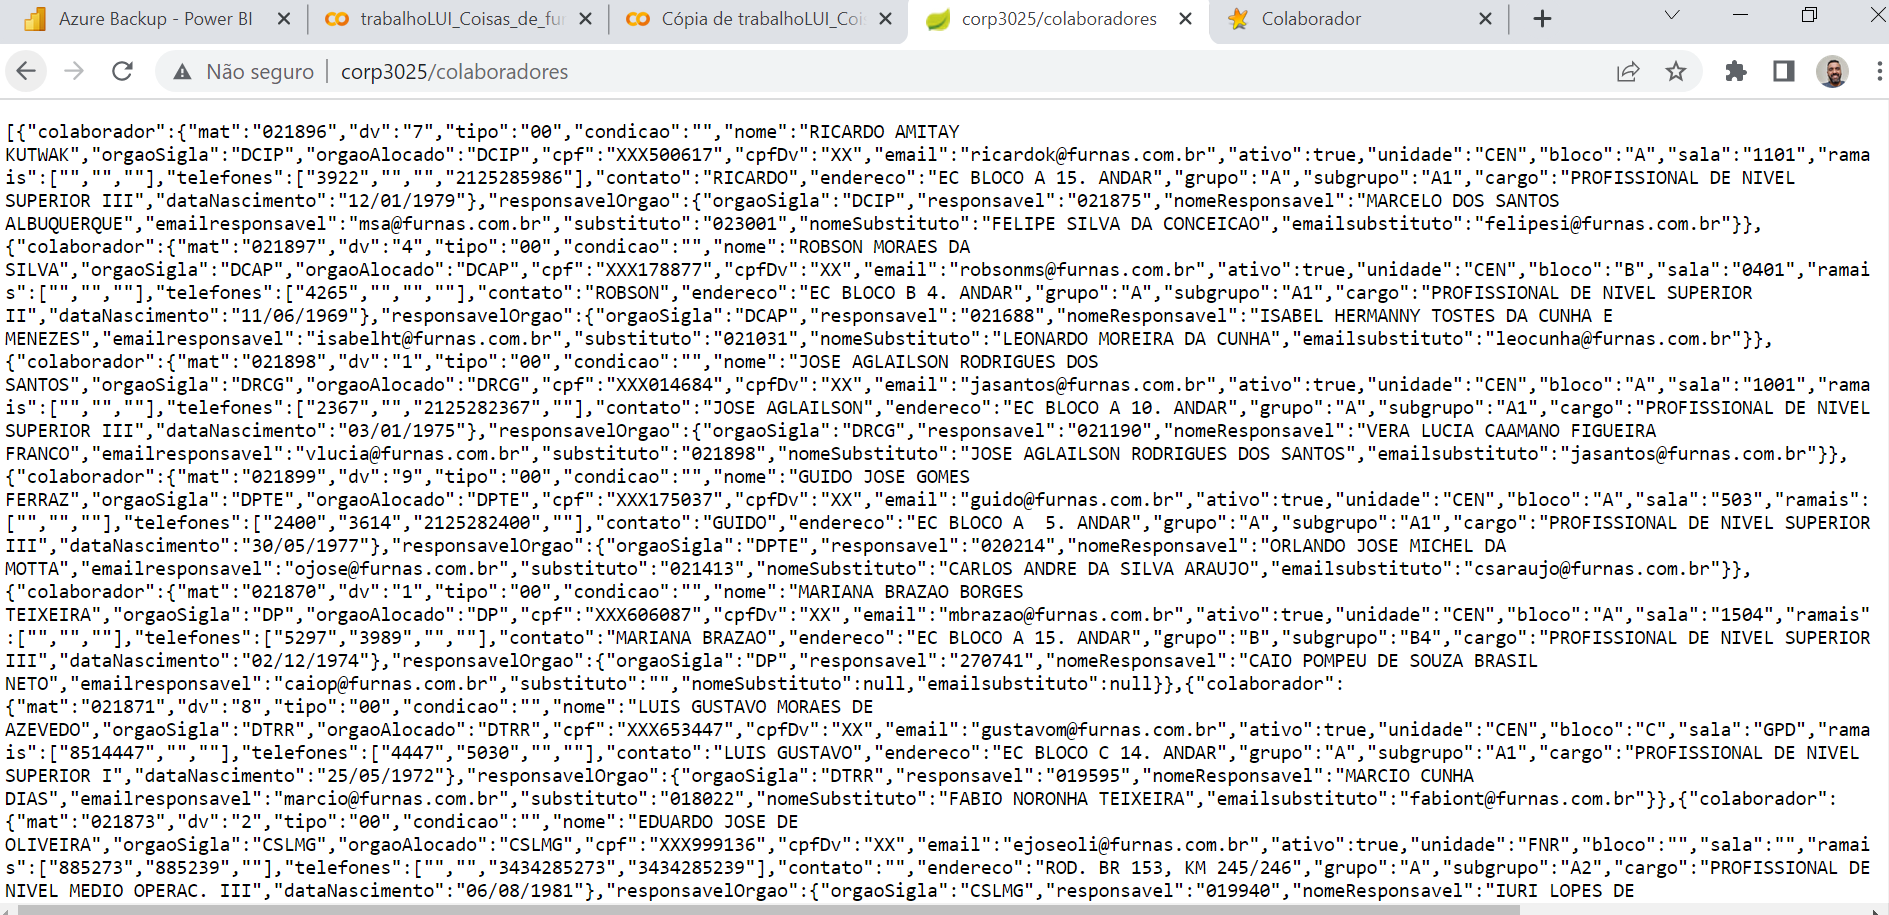

Conexão com o Google Drive após ter salvo o arquivo .JSON no diretório /content/drive/My Drive/trabalhoLUI/

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive/trabalhoLUI/'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

Mounted at /content/drive


In [5]:
ls


colaboradores.json


Abaixo, segue o processo de transformação do arquivo colaboradores.json em dataframe **df_integral**

In [17]:
# load data using Python JSON module
with open('colaboradores.json','r') as f:
    data = json.loads(f.read())
# Flatten data
df_integral = pd.json_normalize(data)

In [18]:
df_integral.head()


,colaborador.mat,colaborador.dv,colaborador.tipo,colaborador.condicao,colaborador.nome,colaborador.orgaoSigla,colaborador.orgaoAlocado,colaborador.cpf,colaborador.cpfDv,colaborador.email,...,colaborador.cargo,colaborador.dataNascimento,responsavelOrgao.orgaoSigla,responsavelOrgao.responsavel,responsavelOrgao.nomeResponsavel,responsavelOrgao.emailresponsavel,responsavelOrgao.substituto,responsavelOrgao.nomeSubstituto,responsavelOrgao.emailsubstituto,responsavelOrgao
0,021896,7,00,,RICARDO AMITAY KUTWAK,DCIP,DCIP,XXX500617,XX,ricardok@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR III,12/01/1979,DCIP,021875,MARCELO DOS SANTOS ALBUQUERQUE,msa@furnas.com.br,023001,FELIPE SILVA DA CONCEICAO,felipesi@furnas.com.br,NaN
1,021897,4,00,,ROBSON MORAES DA SILVA,DCAP,DCAP,XXX178877,XX,robsonms@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR II,11/06/1969,DCAP,021688,ISABEL HERMANNY TOSTES DA CUNHA E MENEZES,isabelht@furnas.com.br,021031,LEONARDO MOREIRA DA CUNHA,leocunha@furnas.com.br,NaN
2,021898,1,00,,JOSE AGLAILSON RODRIGUES DOS SANTOS,DRCG,DRCG,XXX014684,XX,jasantos@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR III,03/01/1975,DRCG,021190,VERA LUCIA CAAMANO FIGUEIRA FRANCO,vlucia@furnas.com.br,021898,JOSE AGLAILSON RODRIGUES DOS SANTOS,jasantos@furnas.com.br,NaN
3,021899,9,00,,GUIDO JOSE GOMES FERRAZ,DPTE,DPTE,XXX175037,XX,guido@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR III,30/05/1977,DPTE,020214,ORLANDO JOSE MICHEL DA MOTTA,ojose@furnas.com.br,021413,CARLOS ANDRE DA SILVA ARAUJO,csaraujo@furnas.com.br,NaN
4,021870,1,00,,MARIANA BRAZAO BORGES TEIXEIRA,DP,DP,XXX606087,XX,mbrazao@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR III,02/12/1974,DP,270741,CAIO POMPEU DE SOUZA BRASIL NETO,caiop@furnas.com.br,,None,None,NaN


Informações gerais do dataframe gerado

In [19]:
df_integral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4483 entries, 0 to 4482
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   colaborador.mat                    4483 non-null   object 
 1   colaborador.dv                     4483 non-null   object 
 2   colaborador.tipo                   4483 non-null   object 
 3   colaborador.condicao               4483 non-null   object 
 4   colaborador.nome                   4483 non-null   object 
 5   colaborador.orgaoSigla             4483 non-null   object 
 6   colaborador.orgaoAlocado           4483 non-null   object 
 7   colaborador.cpf                    4483 non-null   object 
 8   colaborador.cpfDv                  4483 non-null   object 
 9   colaborador.email                  4483 non-null   object 
 10  colaborador.ativo                  4483 non-null   bool   
 11  colaborador.unidade                4466 non-null   objec

Listagem de dados ordenados por nome de colaborador e matrícula.

In [20]:
df_integral.sort_values(by=['colaborador.nome','colaborador.mat'])

,colaborador.mat,colaborador.dv,colaborador.tipo,colaborador.condicao,colaborador.nome,colaborador.orgaoSigla,colaborador.orgaoAlocado,colaborador.cpf,colaborador.cpfDv,colaborador.email,...,colaborador.cargo,colaborador.dataNascimento,responsavelOrgao.orgaoSigla,responsavelOrgao.responsavel,responsavelOrgao.nomeResponsavel,responsavelOrgao.emailresponsavel,responsavelOrgao.substituto,responsavelOrgao.nomeSubstituto,responsavelOrgao.emailsubstituto,responsavelOrgao
1664,022659,7,00,,ABEL DE JESUS FORMOSO,DOSNO,DOSNO,XXX241797,XX,abelj@furnas.com.br,...,PROFISSIONAL DE NIVEL MEDIO OPERAC. III,15/10/1947,DOSNO,017719,RICARDO CAETANO DA SILVA,rcaetano@furnas.com.br,017910,FERNANDO MARCELO LAMAS ALVES,fmalves@furnas.com.br,NaN
3423,023008,0,00,,ABILIO JOSE DA ROCHA REIS CARDOSO,DPTE,DPTE,XXX571977,XX,abilio@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR III,18/09/1983,DPTE,020214,ORLANDO JOSE MICHEL DA MOTTA,ojose@furnas.com.br,021413,CARLOS ANDRE DA SILVA ARAUJO,csaraujo@furnas.com.br,NaN
2308,022321,3,00,,ABIRAN FIALHO FOGACA,DMEBO,DMEBO,XXX990001,XX,abiran@furnas.com.br,...,PROFISSIONAL DE NIVEL MEDIO OPERAC. II,27/01/1977,DMEBO,021286,ROGERIO SILVA DA CUNHA,rcunha@furnas.com.br,019775,ALESSANDRO REZENDE FERREIRA,arf@furnas.com.br,NaN
3427,023086,6,00,,ABNER AUGUSTO PACHECO PIRES,DMESO,DMESO,XXX977467,XX,abner@furnas.com.br,...,PROFISSIONAL DE NIVEL MEDIO OPERAC. I,12/12/1991,DMESO,018922,JOSE MAURO VALERIO JUNIOR,jvalerio@furnas.com.br,021238,WILSON MELO DE LIMA,wilmelo@furnas.com.br,NaN
1072,328793,0,90,,ACACIO GONCALVES DE FARIAS,CSAIG,CSAIG,XXX959777,XX,,...,PRESTADOR DE SERVICO,17/08/1981,CSAIG,019949,ANDREA GOMES DOS REIS VIDAL,deareis@furnas.com.br,021490,MARIO DUTRA PESSOA,mpessoa@furnas.com.br,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,021939,6,00,,ZENAIDE DE FREITAS SANTOS,DCTE,DCTE,XXX830657,XX,zenaides@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR II,28/06/1981,DCTE,021760,THATIANA APARECIDA LELIS,thatiana@furnas.com.br,020650,MARCOS MOURA CARPENTER,marcos@furnas.com.br,NaN
781,271686,3,90,,ZESINHA VIEIRA GONCALVES PONTES,CSSPG,CSSPG,XXX746898,XX,,...,PRESTADOR DE SERVICO,01/10/1960,CSSPG,021936,LEONARDO CUCINO VAZ DE LIMA,leolima@furnas.com.br,021829,LEONARDO DAVID AUGUSTO DE FARIA SILVA,leodavid@furnas.com.br,NaN
1499,272142,6,00,,ZILMAR XAVIER OLIVEIRA,DCGCE,DCGCE,XXX984225,XX,zilmar@furnas.com.br,...,PROFISSIONAL DE NIVEL MEDIO OPERAC. I,05/11/1971,DCGCE,022140,FABIO ALESSANDRO KLEMPER FERNANDES,fklemper@furnas.com.br,021834,ALEXANDRE DE OLIVEIRA RIGAZZO,rigazzo@furnas.com.br,NaN
4014,019245,8,00,,ZULEIDE MARIA DE FATIMA PONTES,DRSP,DRSP,XXX563081,XX,zpontes@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR IV,28/09/1957,DRSP,019932,MARCOS MACHADO DE ALMEIDA,mmachado@furnas.com.br,019877,ISABELLA DANTAS LEITE,idantas@furnas.com.br,NaN


Foi feita um dataframe contendo um filtro somente colaboradores do Departamento de Arquitetura e Segurança da Informação da Tecnologia da Informação (**DAS.G**) 

In [21]:
#df_integral.sort_values(by=
dfdasg=df_integral.loc[df_integral['colaborador.orgaoSigla']=='DASG']
#type(dfdasg)
#dfdasg

In [11]:
dfdasg

,colaborador.mat,colaborador.dv,colaborador.tipo,colaborador.condicao,colaborador.nome,colaborador.orgaoSigla,colaborador.orgaoAlocado,colaborador.cpf,colaborador.cpfDv,colaborador.email,...,colaborador.cargo,colaborador.dataNascimento,responsavelOrgao.orgaoSigla,responsavelOrgao.responsavel,responsavelOrgao.nomeResponsavel,responsavelOrgao.emailresponsavel,responsavelOrgao.substituto,responsavelOrgao.nomeSubstituto,responsavelOrgao.emailsubstituto,responsavelOrgao
34,153710,0,90,,SILVIO AMOEDO DO CANTO JUNIOR,DASG,DASG,XXX736717,XX,silvioa@furnas.com.br,...,PRESTADOR DE SERVICO,18/05/1972,DASG,019118,CLAYTON MENDONCA DE OLIVEIRA,clayton@furnas.com.br,017380,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,crispk@furnas.com.br,NaN
323,021467,3,00,,JOSE LUIZ ZEDANE,DASG,DASG,XXX953567,XX,zedane@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR II,11/05/1970,DASG,019118,CLAYTON MENDONCA DE OLIVEIRA,clayton@furnas.com.br,017380,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,crispk@furnas.com.br,NaN
891,271365,7,90,,FERNANDO BERTOLDO DA SILVA,DASG,DASG,XXX448707,XX,fsilva@furnas.com.br,...,PRESTADOR DE SERVICO,08/04/1959,DASG,019118,CLAYTON MENDONCA DE OLIVEIRA,clayton@furnas.com.br,017380,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,crispk@furnas.com.br,NaN
1537,331051,3,90,,DAIANA RODRIGUES DE ABREU,DASG,DASG,XXX167647,XX,daianara@furnas.com.br,...,PRESTADOR DE SERVICO,25/06/1987,DASG,019118,CLAYTON MENDONCA DE OLIVEIRA,clayton@furnas.com.br,017380,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,crispk@furnas.com.br,NaN
1607,022704,4,00,,TIMOTEO TEIXEIRA DE BRITO,DASG,DASG,XXX920286,XX,timoteo@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR II,15/02/1981,DASG,019118,CLAYTON MENDONCA DE OLIVEIRA,clayton@furnas.com.br,017380,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,crispk@furnas.com.br,NaN
1654,022643,7,00,,ANDRE AUGUSTO HENTZY SOARES,DASG,DASG,XXX845807,XX,andres@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR I,08/11/1962,DASG,019118,CLAYTON MENDONCA DE OLIVEIRA,clayton@furnas.com.br,017380,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,crispk@furnas.com.br,NaN
1753,022975,7,00,,RAFAEL CARLOS DE OLIVEIRA,DASG,DASG,XXX371627,XX,rafaelc@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR I,11/01/1982,DASG,019118,CLAYTON MENDONCA DE OLIVEIRA,clayton@furnas.com.br,017380,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,crispk@furnas.com.br,NaN
2021,017380,3,00,,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,DASG,DASG,XXX762267,XX,crispk@furnas.com.br,...,PROFISSIONAL DE NIVEL SUPERIOR IV,06/06/1963,DASG,019118,CLAYTON MENDONCA DE OLIVEIRA,clayton@furnas.com.br,017380,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,crispk@furnas.com.br,NaN
2032,331570,6,90,,JOAO WANDERSON FERNANDES PEREIRA BEZERRA,DASG,DASG,XXX396301,XX,,...,PRESTADOR DE SERVICO,22/06/1987,DASG,019118,CLAYTON MENDONCA DE OLIVEIRA,clayton@furnas.com.br,017380,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,crispk@furnas.com.br,NaN
2134,331476,4,90,,INGRID GALENO CARNEIRO,DASG,DASG,XXX403951,XX,,...,PRESTADOR DE SERVICO,07/01/1992,DASG,019118,CLAYTON MENDONCA DE OLIVEIRA,clayton@furnas.com.br,017380,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,crispk@furnas.com.br,NaN


A partir do dataframe de departamento DAS.G, foi feita uma ordenação por nome 

In [22]:
df_part = dfdasg[['colaborador.nome', 'colaborador.mat']]
df_part.sort_values(by=['colaborador.nome','colaborador.mat'])

,colaborador.nome,colaborador.mat
1654,ANDRE AUGUSTO HENTZY SOARES,022643
2560,ANDRE LUIS MENDES TEIXEIRA,022447
3840,CLAYTON MENDONCA DE OLIVEIRA,019118
2021,CRISTIANA STACCIOLI GOMES DE OLIVEIRA,017380
1537,DAIANA RODRIGUES DE ABREU,331051
891,FERNANDO BERTOLDO DA SILVA,271365
2134,INGRID GALENO CARNEIRO,331476
2032,JOAO WANDERSON FERNANDES PEREIRA BEZERRA,331570
323,JOSE LUIZ ZEDANE,021467
1753,RAFAEL CARLOS DE OLIVEIRA,022975


Foi feito adicionalmente um gráfico mostrando a quantidade de colaboradores por tipo de contratação, onde:
 - 00 = Funcionários Concursados
 - 07 = Funcionários Licenciados
 - 90 = Terceirizados
 - 92 = Jovem Aprendiz
 - 93 = Conselheiros
 - 94 = Outros Prestadores
 - 95 = Estagiários
 - 99 = Diretoria


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df_integral['colaborador.tipo'] = df_integral['colaborador.tipo'].map({'00':'Funcionários','90':'Terceirizados','94':'Outros','95':'Estagiários','92':'Jovem Aprendiz',
'93':'Conselheiros','07':'Licenciados','99':'Diretoria'},
                             na_action=None)

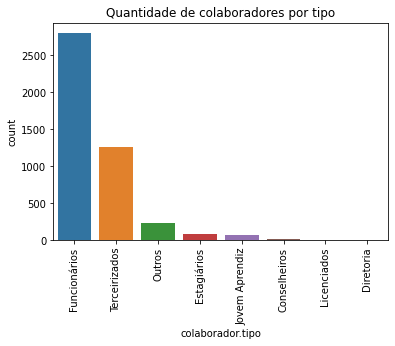

In [25]:
sns.countplot(x = 'colaborador.tipo' , data = df_integral)
plt.title("Quantidade de colaboradores por tipo")
plt.xticks(rotation=90)
plt.show()